In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Input, Concatenate, Conv2D, Dropout, MaxPool2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train = X_train/255
X_test = X_test/255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train.shape

(60000, 28, 28, 1)

In [19]:
inputs = Input(shape = (28, 28, 1))

X = Conv2D(128, kernel_size = (2,2), padding = 'same', strides = 1, 
           activation = 'relu', kernel_initializer = 'he_normal')(inputs)
X = BatchNormalization()(X)
X = MaxPool2D(pool_size = (2,2))(X)
X = Dropout(0.2)(X)

X = Conv2D(128, kernel_size = (2,2), padding = 'same', strides = 2, 
           activation = 'relu', kernel_initializer = 'he_normal')(X)
X = BatchNormalization()(X)
X = MaxPool2D(pool_size = (2,2))(X)
X = Dropout(0.2)(X)

X = Flatten()(X)

X = Dense(64, activation = 'relu', kernel_initializer = 'he_normal')(X)
X = BatchNormalization()(X)
X = Dense(10, activation = 'softmax')(X)

model = Model(inputs = inputs, outputs = X)

In [29]:
opt1 = tf.keras.optimizers.Adam(lr = 2e-3, decay = 1e-5)
opt2 = tf.keras.optimizers.SGD(lr = 2e-3, momentum = 0.9, nesterov = True)
opt3 = tf.keras.optimizers.RMSprop(lr = 2e-3)

model.compile(optimizer = opt1, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
history = model.fit(X_train, y_train, epochs = 5, batch_size = 32, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 91s 2ms/sample - loss: 0.2233 - accuracy: 0.9302 - val_loss: 0.0909 - val_accuracy: 0.9700
Epoch 2/5
48000/48000 [==============================] - 93s 2ms/sample - loss: 0.1105 - accuracy: 0.9650 - val_loss: 0.0689 - val_accuracy: 0.9783
Epoch 3/5
48000/48000 [==============================] - 94s 2ms/sample - loss: 0.0859 - accuracy: 0.9720 - val_loss: 0.0638 - val_accuracy: 0.9808
Epoch 4/5
48000/48000 [==============================] - 94s 2ms/sample - loss: 0.0716 - accuracy: 0.9761 - val_loss: 0.0621 - val_accuracy: 0.9794
Epoch 5/5
48000/48000 [==============================] - 95s 2ms/sample - loss: 0.0631 - accuracy: 0.9791 - val_loss: 0.0530 - val_accuracy: 0.9837


In [22]:
model.save("mnist_functional_API.h5")

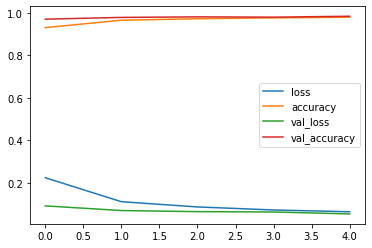

In [23]:
pd.DataFrame(history.history).plot()

In [24]:
preds = model.predict(X_test)

4


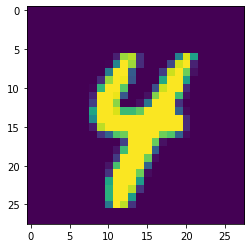

In [27]:
def predict(n): 
    plt.imshow(X_test[n].reshape(28,28))
    print(np.argmax(preds[n]))

predict(9997)